<a href="https://colab.research.google.com/drive/1RjvgCt_QUPB7CQVTQ7DHL6qzfdfR1EYx" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
from keras.models import Sequential  #匯入Sequential模型和Dense層
from keras.layers import Dense

In [0]:
df = pd.read_csv('diabetes.csv')
dataset = df.values
np.random.shuffle(dataset)   #亂數打散資料順序

In [0]:
X = dataset[:, 0:8]   #前8個欄位為特徵資料
Y = dataset[:, 8]     #最後1個欄位為目標標籤資料集

In [0]:
model = Sequential()   #建立Sequential物件
model.add(Dense(10, input_shape=(8,), activation="relu"))   #unit,input_shape,activation分別代表10個神經元、輸入資料維度8、激活函數用relu

In [0]:
model.add(Dense(8, activation="relu"))   #新增第2層隱藏層，8個神經元

In [0]:
model.add(Dense(1, activation="sigmoid")) #輸出層，Sigmoid

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit(X, Y, epochs=150, batch_size=10) #訓練模型

In [16]:
loss, accuracy = model.evaluate(X, Y)         
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))

768/768 [==============================] - 0s 41us/step
loss = 5.62
準確度 = 0.65


In [0]:
X -= X.mean(axis=0)     #先減掉平均值，再除以標準差，可以將數值移位成平均值0，標準差1的資料分布
X /= X.std(axis=0)      

In [18]:
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)      #verbose=0不顯示訓練狀況；=1會顯示所有損失和準確度；=2會顯示每一次訓練週期的資料

In [19]:
loss, accuracy = model.evaluate(X, Y)         
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度提升到0.79！

768/768 [==============================] - 0s 27us/step
loss = 0.42
準確度 = 0.79


In [0]:
from keras.utils import to_categorical  #進行 One-hot Encoding
Y = to_categorical(Y)

In [0]:
model = Sequential()
model.add(Dense(10, input_shape=(8, ), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))          #改用softmax



In [23]:
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

model.fit(X, Y, epochs=150, batch_size=10, verbose=0)      #verbose=0不顯示訓練狀況；=1會顯示所有損失和準確度；=2會顯示每一次訓練週期的資料

loss, accuracy = model.evaluate(X, Y)         
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度提升0.01至0.80！

768/768 [==============================] - 0s 81us/step
loss = 0.41
準確度 = 0.80


In [0]:
#使用初始器

model = Sequential()


#kernal_initializer初始神經層的權重矩陣、bias_initializer初始偏向量的值(zeros代表0,ones代表1)

model.add(Dense(10, input_shape=(8, ),kernel_initializer="random_uniform",bias_initializer="ones",activation="relu"))
model.add(Dense(8, input_shape=(8, ),kernel_initializer="random_uniform",bias_initializer="ones",activation="relu"))
model.add(Dense(2, input_shape=(8, ),kernel_initializer="random_uniform",bias_initializer="ones",activation="softmax"))

In [27]:
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

model.fit(X, Y, epochs=150, batch_size=10, verbose=0)      #verbose=0不顯示訓練狀況；=1會顯示所有損失和準確度；=2會顯示每一次訓練週期的資料

loss, accuracy = model.evaluate(X, Y)         
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.78！

768/768 [==============================] - 0s 92us/step
loss = 0.46
準確度 = 0.78


In [28]:
model.compile(loss="binary_crossentropy", optimizer="adam",  #優化器改成adam
              metrics=["accuracy"])

model.fit(X, Y, epochs=150, batch_size=10, verbose=0)      #verbose=0不顯示訓練狀況；=1會顯示所有損失和準確度；=2會顯示每一次訓練週期的資料

loss, accuracy = model.evaluate(X, Y)         
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.80！

768/768 [==============================] - 0s 110us/step
loss = 0.43
準確度 = 0.80


In [46]:
model.add(Dense(10, input_shape=(8, ),activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 14        
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [47]:
model.compile(loss="binary_crossentropy", optimizer="adam",  #優化器改成adam
              metrics=["accuracy"])

model.fit(X, Y, epochs=150, batch_size=10, verbose=0)      #verbose=0不顯示訓練狀況；=1會顯示所有損失和準確度；=2會顯示每一次訓練週期的資料

loss, accuracy = model.evaluate(X, Y)         
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.81！

768/768 [==============================] - 0s 289us/step
loss = 0.35
準確度 = 0.82


In [0]:
X_train, Y_train = X[:690], Y[:690] #前690筆訓練資料
X_test, Y_test = X[690:], Y[690:] #後78筆訓練資料       #使用df.shape可看到資料總筆數

In [34]:
model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)

In [37]:
loss, accuracy = model.evaluate(X_train, Y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.83！
print("-------------------------------------------")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.81！

690/690 [==============================] - 0s 35us/step
訓練資料集資訊：
loss = 0.38
準確度 = 0.83
-------------------------------------------
78/78 [==============================] - 0s 62us/step
測試資料集資訊：
loss = 0.45
準確度 = 0.81


In [0]:
#驗證資料集

history = model.fit(X_train, Y_train,
                    validation_data = (X_test, Y_test),
                    epochs=150, batch_size=10)

In [48]:
loss, accuracy = model.evaluate(X_train, Y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.84！
print("-------------------------------------------")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.79！

690/690 [==============================] - 0s 33us/step
訓練資料集資訊：
loss = 0.36
準確度 = 0.82
-------------------------------------------
78/78 [==============================] - 0s 128us/step
測試資料集資訊：
loss = 0.30
準確度 = 0.81


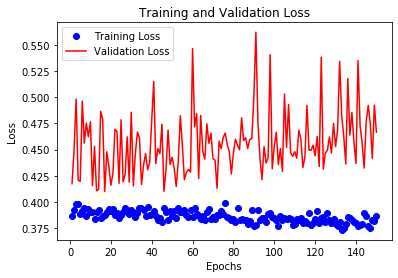

In [49]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label ="Training Loss")
plt.plot(epochs, val_loss, "r", label ="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

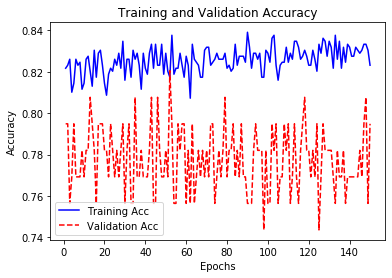

In [50]:
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "b-", label ="Training Acc")
plt.plot(epochs, val_acc, "r--", label ="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [51]:
history = model.fit(X_train, Y_train, validation_split=0.2,   #自動切割成80:20
                    epochs=14, batch_size=10)

Train on 552 samples, validate on 138 samples
Epoch 1/14
552/552 [==============================] - 0s 257us/step - loss: 0.3819 - acc: 0.8062 - val_loss: 0.3803 - val_acc: 0.7971
Epoch 2/14
552/552 [==============================] - 0s 199us/step - loss: 0.3697 - acc: 0.8207 - val_loss: 0.3858 - val_acc: 0.8261
Epoch 3/14
552/552 [==============================] - 0s 219us/step - loss: 0.3564 - acc: 0.8225 - val_loss: 0.4011 - val_acc: 0.8188
Epoch 4/14
552/552 [==============================] - 0s 232us/step - loss: 0.3581 - acc: 0.8261 - val_loss: 0.4243 - val_acc: 0.8043
Epoch 5/14
552/552 [==============================] - 0s 273us/step - loss: 0.3578 - acc: 0.8351 - val_loss: 0.3858 - val_acc: 0.8188
Epoch 6/14
552/552 [==============================] - 0s 257us/step - loss: 0.3505 - acc: 0.8370 - val_loss: 0.4331 - val_acc: 0.8116
Epoch 7/14
552/552 [==============================] - 0s 255us/step - loss: 0.3542 - acc: 0.8297 - val_loss: 0.4228 - val_acc: 0.8188
Epoch 8/14
552/5

In [52]:
loss, accuracy = model.evaluate(X_train, Y_train)         
print("訓練資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.82！
print("-------------------------------------------")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集資訊：")
print("loss = {:.2f}".format(loss))
print("準確度 = {:.2f}".format(accuracy))      #準確度0.81！

#Training loss和Validation loss相當接近，準確度只差0.01

690/690 [==============================] - 0s 42us/step
訓練資料集資訊：
loss = 0.36
準確度 = 0.82
-------------------------------------------
78/78 [==============================] - 0s 85us/step
測試資料集資訊：
loss = 0.40
準確度 = 0.81


In [59]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
Y_pred = model.predict_classes(X_test, batch_size=10, verbose=0)
print(Y_pred[0], Y_pred[1])  #第0筆不會得糖尿病、第1筆會得糖尿病

690/690 [==============================] - 0s 405us/step
訓練資料集的準確度 = 0.78
78/78 [==============================] - 0s 70us/step
測試資料集的準確度 = 0.72
[0] [1]
